In [31]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft

%matplotlib inline

In [32]:
audio_path = './test_train_data/'
pict_Path = './test_pic_train/'
test_pict_Path = './test_pic_test/'
test_audio_path = './test_val_data/'
samples = []

In [33]:
if not os.path.exists(pict_Path):
    os.makedirs(pict_Path)

if not os.path.exists(test_pict_Path):
    os.makedirs(test_pict_Path)


subFolderList = []
for x in os.listdir(audio_path):
    if os.path.isdir(audio_path + '/' + x):
        subFolderList.append(x)
        if not os.path.exists(pict_Path + '/' + x):
            os.makedirs(pict_Path +'/'+ x)
subFolderList.sort()

In [34]:
sample_audio = []
total = 0
for x in subFolderList:
    
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    total += len(all_files)
    # collect the first file from each dir
    sample_audio.append(audio_path  + x + '/'+ all_files[0])
    
    # show file counts
    print('count: %d : %s' % (len(all_files), x ))
print(total//5)

count: 5 : 2017019740001_kwakjuheon
count: 5 : 2017019740002_kimjiho
count: 5 : 2017019740003_songyejin
count: 5 : 2017019740004_parksohui
count: 5 : 2017019740005_moonyeonwoo
count: 5 : 2017019740006_kangsubin
count: 5 : 2017019740007_leekyeongeun
count: 5 : 2017019740008_chochaeyeon
count: 5 : 2017019740009_shindonghwan
count: 5 : 2017019740010_kwakmirae
count: 5 : 2017019740011_kimhyeryeong
count: 5 : 2017019740012_chaeminjoon
count: 5 : 2017019740013_kwakyiheon
count: 5 : 2017019740014_leesumin
count: 5 : 2017019740015_choihayoung
count: 5 : 2017019740016_kangyeseo
count: 5 : 2017019740017_kwakmihyang
count: 5 : 2017019740018_eundano
count: 5 : 2017019740019_limjinju
count: 5 : 2017019770001_kwonyuna
count: 5 : 2017019770002_kwoneunkyung
count: 5 : 2017019770003_johaesu
count: 5 : 2017019770004_leebyeongjin
count: 5 : 2017019770005_hyeonsanghyeok
count: 5 : 2017019770006_jennie
count: 5 : 2017019770007_simseungmin
count: 5 : 2017019770008_parksomi
count: 5 : 2017019770009_yuminji
c

In [35]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
#     print(audio, noverlap)
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

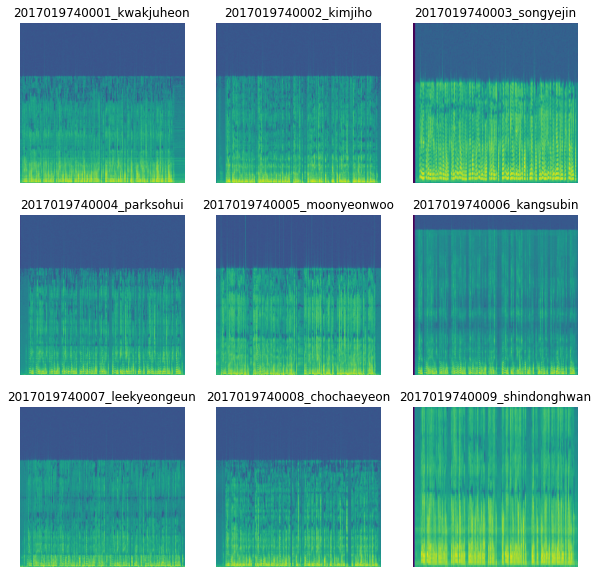

In [36]:
fig = plt.figure(figsize=(10,10))

# for each of the samples
for i, filepath in enumerate(sample_audio[:9]):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-2]
    plt.title(label)
    
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')



In [37]:
five_samples = []

fig = plt.figure(figsize=(10,10))

for i, filepath in enumerate(five_samples):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-1]
    plt.title('"five": '+label)
    
    # create spectogram
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')

<Figure size 720x720 with 0 Axes>

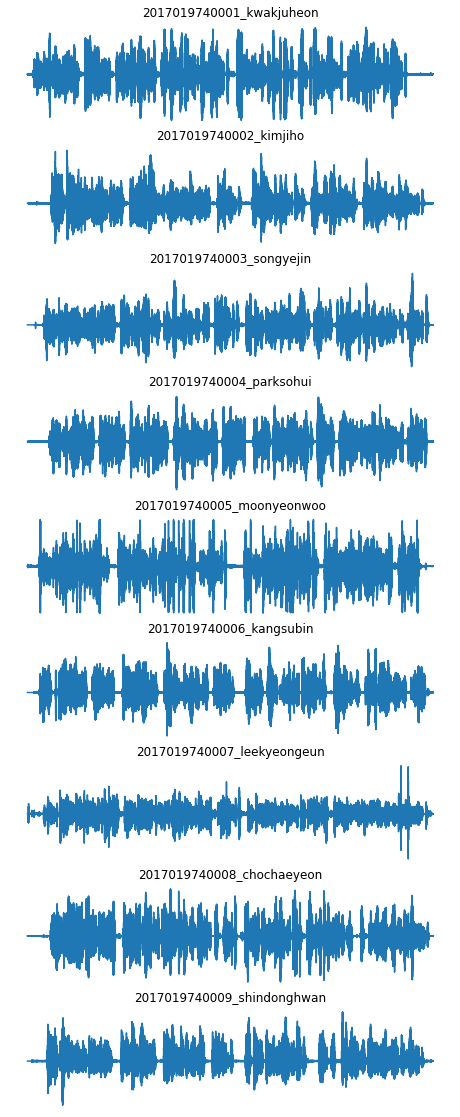

In [38]:
fig = plt.figure(figsize=(8,20))
for i, filepath in enumerate(sample_audio[:9]):
    plt.subplot(9,1,i+1)
    samplerate, test_sound  = wavfile.read(filepath)
    plt.title(filepath.split('/')[-2])
    plt.axis('off')
    plt.plot(test_sound)

In [39]:
def wav2img(wav_path, targetdir='', figsize=(4,4)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 288 x 288
    """

    fig = plt.figure(figsize=figsize)    
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    ## create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.imsave('%s.png' % output_file, spectrogram)
    plt.close()


In [40]:
def wav2img_waveform(wav_path, targetdir='', figsize=(4,4)):
    samplerate,test_sound  = wavfile.read(sample_audio[0])
    fig = plt.figure(figsize=figsize)
    plt.plot(test_sound)
    plt.axis('off')
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    plt.savefig('%s.png' % output_file)
    plt.close()


In [43]:
for i, x in enumerate(subFolderList[:9]):
    print(i, ':', x)
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    for file in all_files[:10]:
        wav2img(audio_path + x + '/' + file, pict_Path + x)


0 : 2017019740001_kwakjuheon
1 : 2017019740002_kimjiho
2 : 2017019740003_songyejin
3 : 2017019740004_parksohui
4 : 2017019740005_moonyeonwoo
5 : 2017019740006_kangsubin
6 : 2017019740007_leekyeongeun
7 : 2017019740008_chochaeyeon
8 : 2017019740009_shindonghwan


In [130]:
import librosa
audio_data = './test_train_data/2017019740001_kwakjuheon/1.wav'
# audio_path = './test_train_data/2017019740001_kwakjuheon/1.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>


In [131]:
librosa.load(audio_data, sr=44100)
# librosa.load(audio_data, sr=None)

(array([-2.9516563e-05, -2.8720404e-05,  3.0796321e-06, ...,
        -1.1824594e-04, -1.5400191e-04,  0.0000000e+00], dtype=float32),
 44100)

In [132]:
import IPython.display as ipd
ipd.Audio(audio_data)

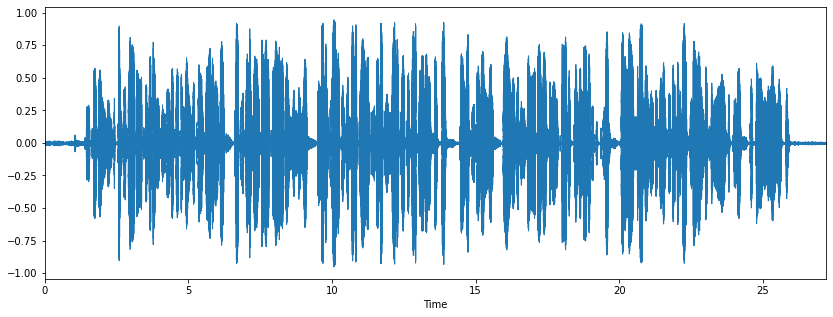

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

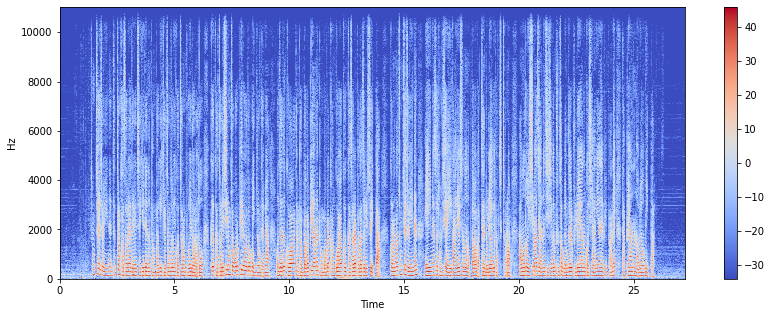

In [134]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

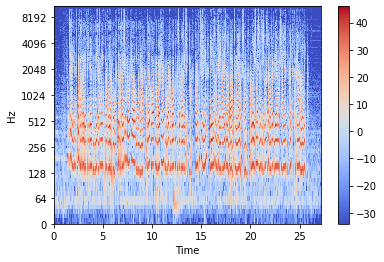

In [135]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [136]:
import numpy as np
import IPython.display as ipd
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
#Saving the audio


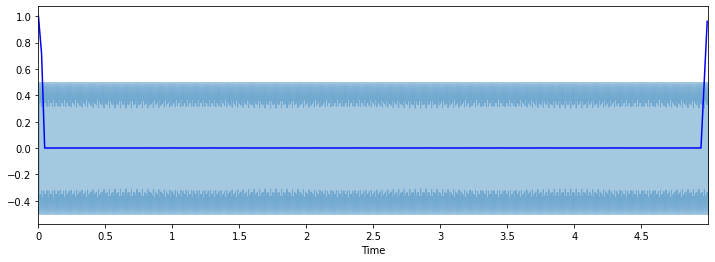

In [137]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

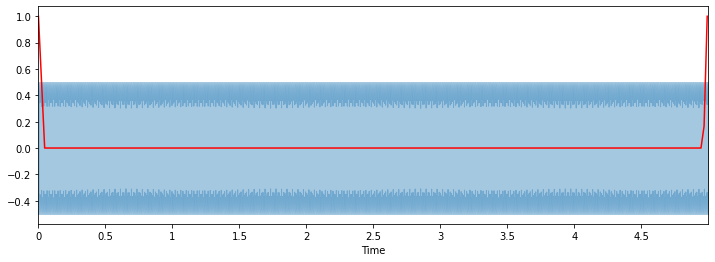

In [138]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

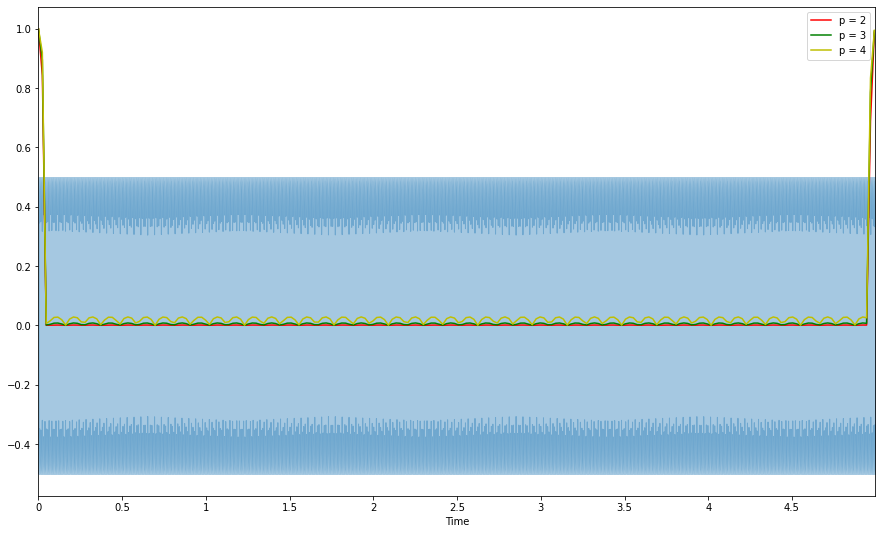

In [139]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

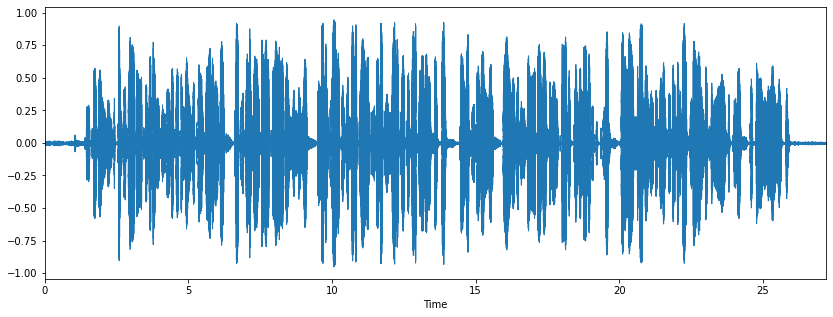

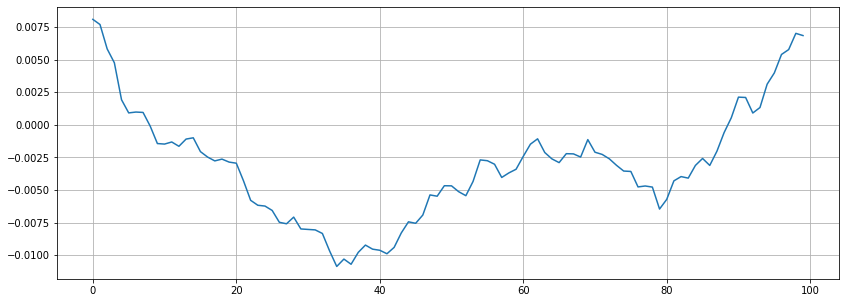

In [140]:
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

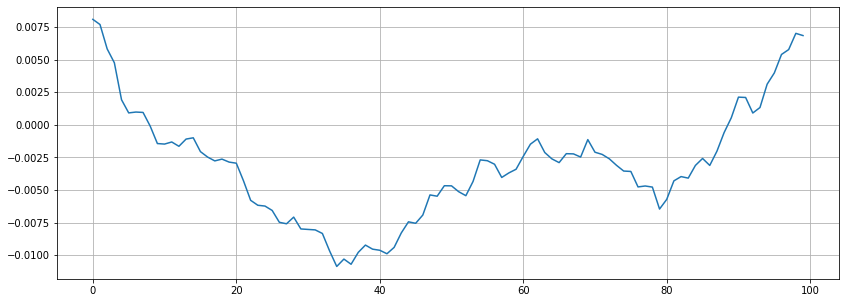

In [141]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [142]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16

2


(20, 1172)


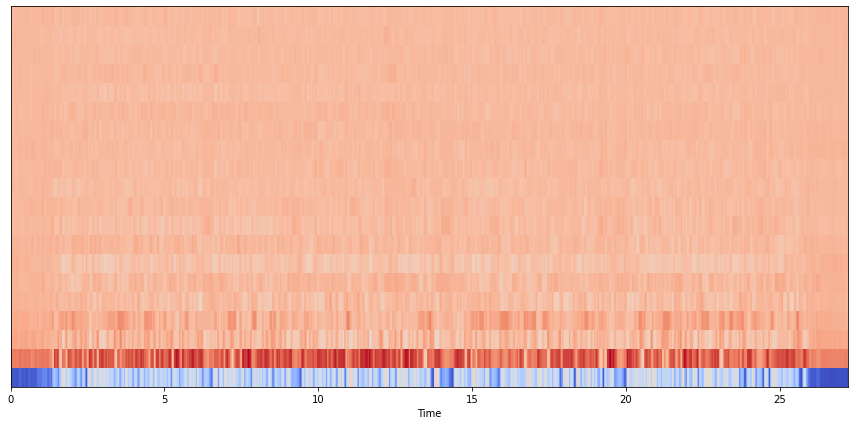

In [143]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

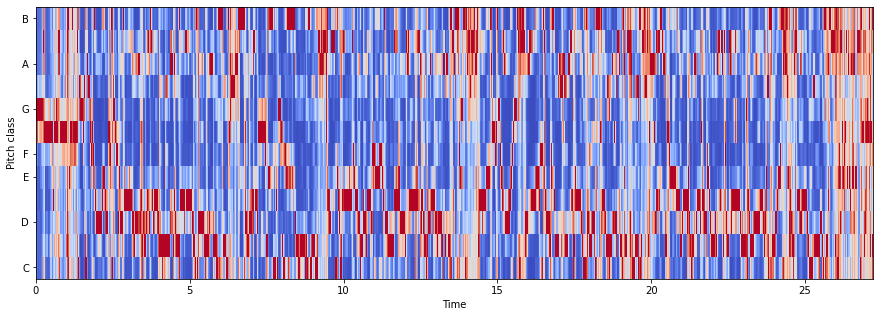

In [144]:
import librosa.feature as lbft
chromagram = librosa.feature.chroma_stft(x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

In [145]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers
from tensorflow.keras import layers
import tensorflow.keras
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

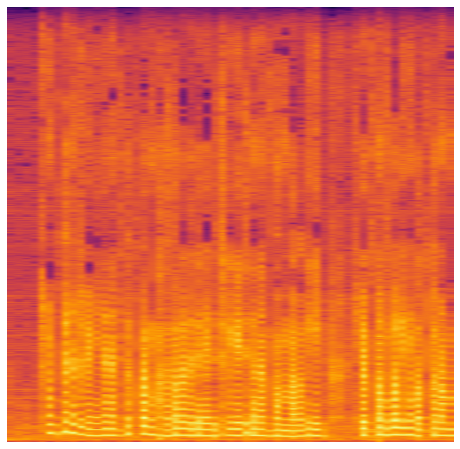

<Figure size 432x288 with 0 Axes>

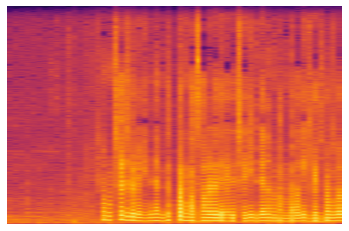

<Figure size 432x288 with 0 Axes>

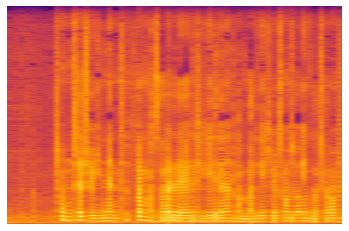

<Figure size 432x288 with 0 Axes>

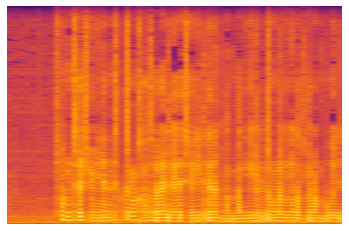

<Figure size 432x288 with 0 Axes>

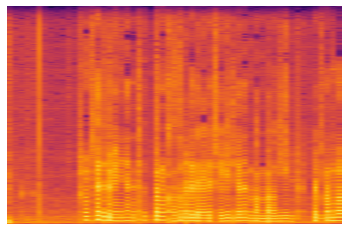

<Figure size 432x288 with 0 Axes>

In [154]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
for filename in os.listdir('./test_train_data/2017019740001_kwakjuheon/'):
        songname = './test_train_data/2017019740001_kwakjuheon/'
        y, sr = librosa.load(songname+filename, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{filename[:-3].replace(".", "")}.png')
        plt.show()
        plt.clf()
        plt.show()

In [155]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [156]:


for filename in os.listdir('./test_train_data/2017019740001_kwakjuheon'):
        songname = f'./test_train_data/2017019740001_kwakjuheon/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [157]:
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [158]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [159]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
1/1 [==============================] - 0s 708us/step - loss: 2.2190 - accuracy: 0.1875
Epoch 2/100
1/1 [==============================] - 0s 576us/step - loss: 1.8649 - accuracy: 0.6250
Epoch 3/100
1/1 [==============================] - 0s 592us/step - loss: 1.5530 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 557us/step - loss: 1.2713 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 776us/step - loss: 1.0298 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 730us/step - loss: 0.8137 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 559us/step - loss: 0.6222 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 683us/step - loss: 0.4576 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 580us/step - loss: 0.3213 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 541us/step - loss: 0.2157 - accuracy: 1.0000
Epoch 11/

1/1 [==============================] - 0s 530us/step - loss: 3.3751e-06 - accuracy: 1.0000
Epoch 81/100
1/1 [==============================] - 0s 869us/step - loss: 3.3304e-06 - accuracy: 1.0000
Epoch 82/100
1/1 [==============================] - 0s 594us/step - loss: 3.3304e-06 - accuracy: 1.0000
Epoch 83/100
1/1 [==============================] - 0s 585us/step - loss: 3.2857e-06 - accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 519us/step - loss: 3.2857e-06 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 521us/step - loss: 3.2633e-06 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 567us/step - loss: 3.2410e-06 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 673us/step - loss: 3.2186e-06 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 528us/step - loss: 3.1739e-06 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 602us/step - loss: 3.1